In [14]:
import geopandas as gpd
import numpy as np
import fiona
import pandas as pd

shapefile = gpd.read_file("not.shp")

In [15]:
shapefile = shapefile.query('NMUN=="Valencia"')

In [16]:
shapefile.plot();

ImportError: cannot import name '_imaging' from 'PIL' (C:\Users\domyd\AppData\Roaming\Python\Python37\site-packages\PIL\__init__.py)

In [28]:
df = pd.read_csv(
    "Income_per_secciones.csv", delimiter=";", header=None,
    names=["CUSEC","income"], usecols=["CUSEC","income"],encoding = "ISO-8859-1");
df

,CUSEC,income
0,4625001001,14918
1,4625001002,16769
2,4625001003,16668
3,4625001005,17188
4,4625001007,21888
...,...,...
591,4625019012,8931
592,4625019013,9306
593,4625019014,8591
594,4625019015,9883


In [29]:
shapefile.CUSEC = shapefile.CUSEC.astype(np.int64)
df.CUSEC.astype(np.int64)
shapefile = shapefile.merge(df, on='CUSEC')

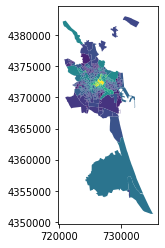

In [30]:
shapefile.plot(column='income');